<a href="https://colab.research.google.com/github/2303A51700/23CSBTB27-28/blob/main/lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_table("/content/Classified_Data.txt",sep=',', index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [3]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [4]:
raw_data = pd.read_csv('Classified_Data.txt')

In [5]:
raw_data = pd.read_csv('Classified_Data.txt', index_col = 0)

In [6]:
print(raw_data.columns)

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')


In [11]:
scaler.fit(raw_data.drop('TARGET CLASS', axis=1))

StandardScaler()

In [12]:
scaled_features = scaler.transform(raw_data.drop('TARGET CLASS', axis=1))

In [13]:
scaled_data = pd.DataFrame(scaled_features, columns = raw_data.drop('TARGET CLASS', axis=1).columns)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x = scaled_data

y = raw_data['TARGET CLASS']


In [16]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
model = KNeighborsClassifier(n_neighbors = 1)

In [20]:
model.fit(x_training_data, y_training_data)

KNeighborsClassifier(n_neighbors=1)

In [21]:
predictions = model.predict(x_test_data)

In [22]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

In [23]:
print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       143
           1       0.90      0.95      0.92       157

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [24]:
print(confusion_matrix(y_test_data, predictions))

[[126  17]
 [  8 149]]


In [25]:
error_rates = []

In [26]:
for i in np.arange(1, 101):

    new_model = KNeighborsClassifier(n_neighbors = i)

    new_model.fit(x_training_data, y_training_data)

    new_predictions = new_model.predict(x_test_data)

    error_rates.append(np.mean(new_predictions != y_test_data))

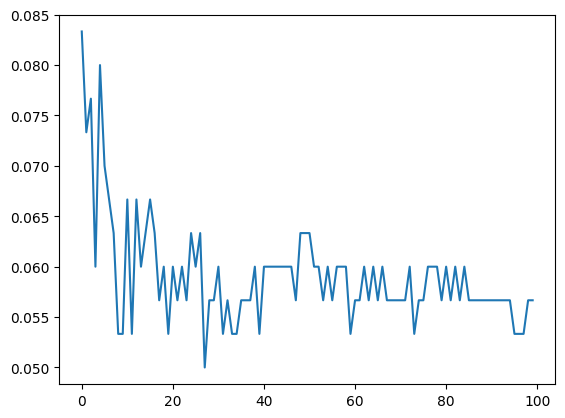

In [27]:
plt.plot(error_rates)

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       148
           1       0.87      0.91      0.89       152

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300

[[127  21]
 [ 14 138]]


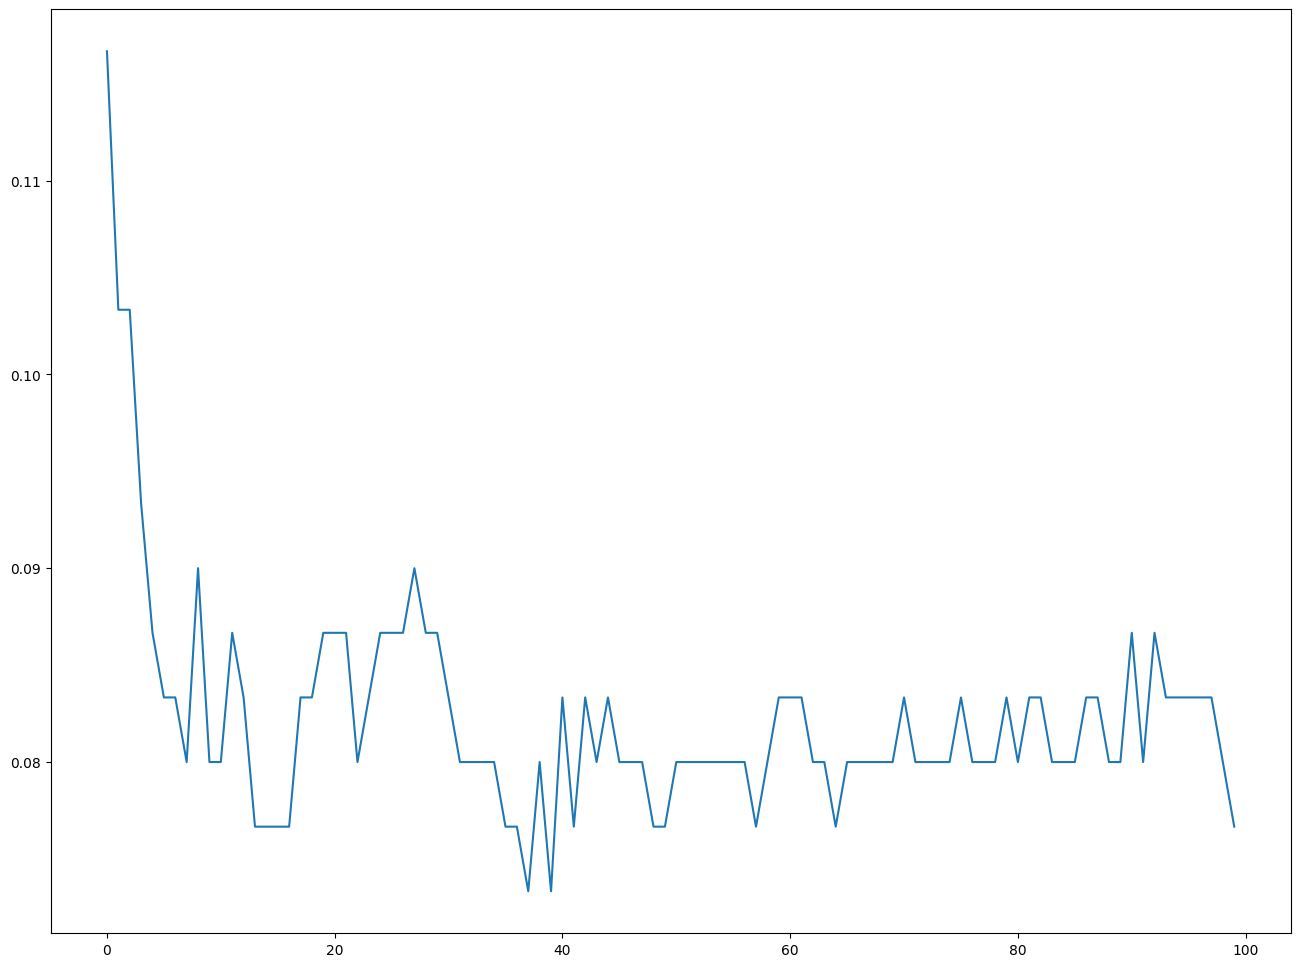

In [28]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

#Import the data set

raw_data = pd.read_csv('/content/Classified_Data.txt', index_col = 0)

#Import standardization functions from scikit-learn

from sklearn.preprocessing import StandardScaler

#Standardize the data set

scaler = StandardScaler()

scaler.fit(raw_data.drop('TARGET CLASS', axis=1))

scaled_features = scaler.transform(raw_data.drop('TARGET CLASS', axis=1))

scaled_data = pd.DataFrame(scaled_features, columns = raw_data.drop('TARGET CLASS', axis=1).columns)

#Split the data set into training data and test data

from sklearn.model_selection import train_test_split

x = scaled_data

y = raw_data['TARGET CLASS']

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)

#Train the model and make predictions

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 1)

model.fit(x_training_data, y_training_data)

predictions = model.predict(x_test_data)

#Performance measurement

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

print(classification_report(y_test_data, predictions))

print(confusion_matrix(y_test_data, predictions))

#Selecting an optimal K value

error_rates = []

for i in np.arange(1, 101):

    new_model = KNeighborsClassifier(n_neighbors = i)

    new_model.fit(x_training_data, y_training_data)

    new_predictions = new_model.predict(x_test_data)

    error_rates.append(np.mean(new_predictions != y_test_data))

plt.figure(figsize=(16,12))

plt.plot(error_rates)